In [93]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [94]:
class Lattice:
    size = 0
    shape = False
    temp = 0
    
    def __init__(self, J, size = 10, shape = False, rand = True):
        self.J = J
        #initialize lattice grid --> 10x10 square grid filled w zeros
        data = [[0 for _ in range(size)] for _ in range(size)]
        self.size = size
        self.shape = shape
        self.lat = pd.DataFrame(data)
            
        for i in range(size):
            j_range = size
            if (shape == True):
                j_range = size - i
            for j in range(j_range):
                if (rand == False):
                    self.lat.at[i, j] = 1
                if (rand == True):
                    num = random.random()
                    if (num < 0.5):
                        self.lat.at[i, j] = -1
                    else:
                        self.lat.at[i, j] = 1
                        
    #change spin (takes in a list of coordinates)
    def flip(self, lat_list):
        if type(lat_list) is not list:
            if self.lat.at[lat_list[0], lat_list[1]] != 0:
                self.lat.at[lat_list[0], lat_list[1]] = -1*(self.lat.at[lat_list[0], lat_list[1]])
        else:
            for i in range(len(lat_list)):
                if self.lat.at[lat_list[i][0], lat_list[i][1]] != 0:
                    self.lat.at[lat_list[i][0], lat_list[i][1]] = -1*(self.lat.at[lat_list[i][0], lat_list[i][1]])

    def getE(self):
        return 0
    
    def get_lattice(self):
        return self.lat
    
    def set_temp(self, T):
        self.temp = T
    
    def num_lattice(self):
        print(self.lat.to_string(header=False, index=False))
    
    def color_lattice(self):
        plt.clf()
        plt.imshow(self.lat)
                        

4
 1  1 -1 -1  1 -1  1 -1  1  1
 1  1  1  1 -1 -1  1  1 -1  1
 1  1 -1 -1  1 -1 -1 -1  1 -1
-1 -1  1  1 -1 -1  1  1 -1  1
 1 -1  1 -1  1  1 -1  1  1  1
 1 -1 -1 -1  1  1 -1 -1 -1 -1
-1 -1  1  1 -1  1 -1 -1  1 -1
 1 -1  1 -1  1  1  1 -1 -1  1
 1  1 -1 -1  1  1 -1  1 -1 -1
 1  1 -1  1  1 -1 -1  1 -1 -1


-9
 1 -1 -1 -1 -1 -1 -1  1  1 -1
 1  1  1 -1  1 -1  1 -1 -1  0
-1 -1 -1  1  1  1 -1 -1  0  0
-1 -1  1 -1  1 -1 -1  0  0  0
 1 -1  1 -1 -1  1  0  0  0  0
-1 -1 -1  1  1  0  0  0  0  0
-1  1 -1 -1  0  0  0  0  0  0
 1  1 -1  0  0  0  0  0  0  0
 1 -1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0


100
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1


55
1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 0
1 1 1 1 1 1 1 1 0 0
1 1 1 1 1 1 1 0 0 0
1 1 1 1 1 1 0 0 0 0
1 1 1 1 1 0 0 0 0 0
1 1 1 1 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
1 1 0 0 0 0 0 0 0 0
1 

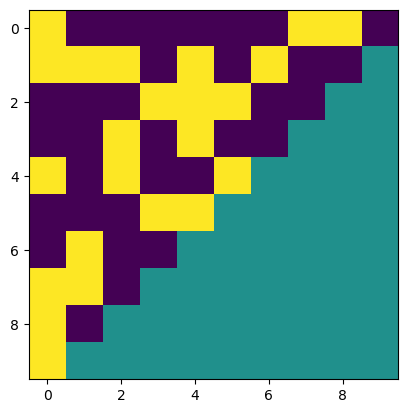

In [95]:
square_lattice = Lattice(J = 1)
square_df = square_lattice.get_lattice()

T_spins = square_df.values.sum()
print(T_spins)
print(square_df.to_string(header=False, index=False))

print('\n')

tri_lattice = Lattice(J = 1, shape = True)
tri_df = tri_lattice.get_lattice()
tri_lattice.color_lattice()

tri_spins = tri_df.values.sum()
print(tri_spins)
print(tri_df.to_string(header=False, index=False))

print('\n')

basic_square = Lattice(J = 1, rand = False)
basic_sq = basic_square.get_lattice()

basic_T_spins = basic_sq.values.sum()
print(basic_T_spins)
print(basic_sq.to_string(header=False, index=False))

print('\n')

basic_triangle = Lattice(J = 1, shape = True, rand = False)
basic_tri = basic_triangle.get_lattice()

basic_tri_spins = basic_tri.values.sum()
print(basic_tri_spins)
print(basic_tri.to_string(header=False, index=False))

In [96]:
# flip test

lattice_list = (0, 1)
basic_triangle.flip(lattice_list)
basic_triangle.num_lattice()

1 -1 1 1 1 1 1 1 1 1
1  1 1 1 1 1 1 1 1 0
1  1 1 1 1 1 1 1 0 0
1  1 1 1 1 1 1 0 0 0
1  1 1 1 1 1 0 0 0 0
1  1 1 1 1 0 0 0 0 0
1  1 1 1 0 0 0 0 0 0
1  1 1 0 0 0 0 0 0 0
1  1 0 0 0 0 0 0 0 0
1  0 0 0 0 0 0 0 0 0
